# Visu 8: Width histogram

# I/ Close up images

## Presentation

**Data**:\
106 pictures taken at 100x magnification of hyphae in one plate.\
All types of hyphea (big runner, runner, bas, ..) are represented.\
The width is then labeled with `labelme`.

**Plate**:\
The plate is plate number 1050.\
It is of strain C2. Treatment is 100C.\
The crossing was observed on 09/05.

**Conclusion**:\
Values go from 2.3 to 12.5 micrometers.\
Median is 4.7 micrometers.

## Setup

In [5]:
import os
import matplotlib.pyplot as plt
import random
import json
import pandas as pd
import numpy as np

from amftrack.util.sys import storage_path
from amftrack.util.image_analysis import convert_to_micrometer

## Plate overview

In [13]:
full_stiched_path = os.path.join(storage_path, "plate1050", "20220513_0839_Plate18", "StitchedImage.png")

## Get data

### Fetch segments

In [23]:
source = os.path.join(storage_path, "plate1050_width")

def is_valid(name):
    return ".json" in name

segments = {}
for file in os.listdir(source):
    if is_valid(file):
        path = os.path.join(source, file)
        with open(path) as f:
            json_from_file = json.load(f)
        for shape in json_from_file["shapes"]:
            if shape["label"] == "width":
                segments[file] = shape["points"]

### Convert setgment to width

In [31]:
import numpy as np
from amftrack.util.image_analysis import convert_to_micrometer

labels = {}

for key in segments.keys():
    point1 = np.array(segments[key][0])
    point2 = np.array(segments[key][1])
    length = convert_to_micrometer(
                np.linalg.norm(point1 - point2), magnification=100
            )
    labels[key] = length

## Data visualisation

In [32]:
values = [labels[key] for key in labels.keys()]

(array([ 8., 15., 10.,  6.,  8., 12., 11., 11.,  6.,  6.,  7.,  0.,  1.,
         0.,  1.,  0.,  3.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 2.28162126,  2.7267886 ,  3.17195593,  3.61712327,  4.06229061,
         4.50745795,  4.95262529,  5.39779263,  5.84295997,  6.2881273 ,
         6.73329464,  7.17846198,  7.62362932,  8.06879666,  8.513964  ,
         8.95913134,  9.40429867,  9.84946601, 10.29463335, 10.73980069,
        11.18496803, 11.63013537, 12.07530271, 12.52047004]),
 <a list of 23 Patch objects>)

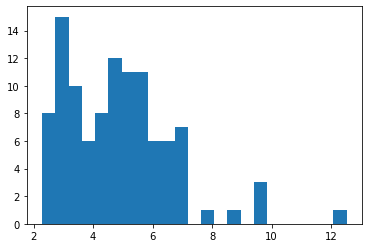

In [42]:
plt.hist(values, bins = 23)

In [38]:
serie = pd.Series(values)

In [39]:
serie.describe()

count    106.000000
mean       4.819916
std        1.801394
min        2.281621
25%        3.308409
50%        4.714272
75%        5.755497
max       12.520470
dtype: float64

# II/ Prince images

In [26]:
old_plate = os.path.join(storage_path, "labels_precise", "20220527_0153_Plate08", "Img")
new_plate = os.path.join(storage_path, "labels_precise", "20220527_0332_Plate01", "Img")

## Presentation

Both plate are C2

**Old plate**\
Is a plate that crossed a while ago.\
It has 70 points.

**New plate**\
Is a plate that crossed recently.\
It has 150 points.

**Conclusion**\
The values range between 2.4 and 15.2 for old plate and between 2.5 and 7.8 for the new plate.\
Which makes sense that the older plate would have some thicker hyphas.\
Most values are found between 3 and 8 micrometers.\
Those values are consistent with the values observed on the plate at 100x.

## Old plate

### Fetch segments

In [16]:
def is_valid(name):
    return ".json" in name

segments_new = []
for file in os.listdir(old_plate):
    if is_valid(file):
        path = os.path.join(old_plate, file)
        with open(path) as f:
            json_from_file = json.load(f)
        for shape in json_from_file["shapes"]:
            if shape["label"] == "width":
                segments_new. append(shape["points"])

### Convert setgment to width

In [17]:
labels = []

for segment in segments_new:
    point1 = np.array(segment[0])
    point2 = np.array(segment[1])
    length = convert_to_micrometer(
                np.linalg.norm(point1 - point2), magnification=2
            )
    labels.append(length)

## Data visualisation

In [18]:
len(labels)

70

(array([ 4.,  8., 19., 10.,  6.,  4.,  2.,  3.,  2.,  3.,  0.,  1.,  1.,
         0.,  0.,  1.,  2.,  1.,  0.,  0.,  0.,  2.,  1.]),
 array([ 2.39205357,  2.95064039,  3.50922722,  4.06781405,  4.62640088,
         5.1849877 ,  5.74357453,  6.30216136,  6.86074819,  7.41933501,
         7.97792184,  8.53650867,  9.0950955 ,  9.65368232, 10.21226915,
        10.77085598, 11.32944281, 11.88802963, 12.44661646, 13.00520329,
        13.56379012, 14.12237694, 14.68096377, 15.2395506 ]),
 <a list of 23 Patch objects>)

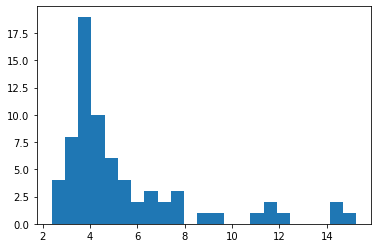

In [20]:
plt.hist(labels, bins = 23)

In [23]:
serie = pd.Series(labels)

In [24]:
serie.describe()

count    70.000000
mean      5.454233
std       2.941387
min       2.392054
25%       3.688637
50%       4.210676
75%       6.117486
max      15.239551
dtype: float64

## Young plate

### Fetch segments

In [28]:
def is_valid(name):
    return ".json" in name

segments_new = []
for file in os.listdir(new_plate):
    if is_valid(file):
        path = os.path.join(new_plate, file)
        with open(path) as f:
            json_from_file = json.load(f)
        for shape in json_from_file["shapes"]:
            if shape["label"] == "width":
                segments_new. append(shape["points"])

### Convert setgment to width

In [29]:
labels = []

for segment in segments_new:
    point1 = np.array(segment[0])
    point2 = np.array(segment[1])
    length = convert_to_micrometer(
                np.linalg.norm(point1 - point2), magnification=2
            )
    labels.append(length)

## Data visualisation

In [30]:
len(labels)

154

(array([ 2.,  0.,  4., 10., 10.,  9.,  7., 11.,  3., 10.,  9.,  9.,  9.,
         7.,  8., 10., 11., 12.,  3.,  4.,  4.,  0.,  2.]),
 array([2.51163791, 2.74318719, 2.97473647, 3.20628575, 3.43783504,
        3.66938432, 3.9009336 , 4.13248288, 4.36403216, 4.59558144,
        4.82713072, 5.05868   , 5.29022928, 5.52177856, 5.75332784,
        5.98487713, 6.21642641, 6.44797569, 6.67952497, 6.91107425,
        7.14262353, 7.37417281, 7.60572209, 7.83727137]),
 <a list of 23 Patch objects>)

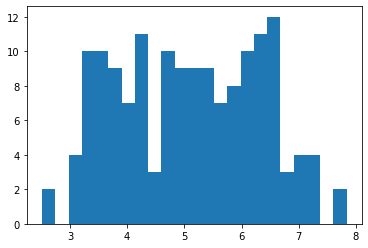

In [31]:
plt.hist(labels, bins = 23)

In [33]:
serie = pd.Series(labels)

In [34]:
serie.describe()

count    154.000000
mean       5.087088
std        1.228165
min        2.511638
25%        4.015949
50%        5.113234
75%        6.162500
max        7.837271
dtype: float64